In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
pip install pmdarima

     |████████████████████████████████| 1.5MB 2.7MB/s 
     |████████████████████████████████| 2.1MB 16.6MB/s 
     |████████████████████████████████| 8.7MB 17.6MB/s 
     |████████████████████████████████| 808kB 36.8MB/s 
ERROR: datascience 0.10.6 has requirement folium==0.2.1, but you'll have folium 0.8.3 which is incompatible.
  Found existing installation: Cython 0.29.21
    Uninstalling Cython-0.29.21:
      Successfully uninstalled Cython-0.29.21
  Found existing installation: statsmodels 0.10.2
    Uninstalling statsmodels-0.10.2:
      Successfully uninstalled statsmodels-0.10.2
  Found existing installation: setuptools 50.3.0
    Uninstalling setuptools-50.3.0:
      Successfully uninstalled setuptools-50.3.0


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
sns.set_style("whitegrid")
sns.set_palette("GnBu_d")

In [ ]:
from pmdarima.arima import auto_arima

In [ ]:
eurmad=pd.read_csv("/content/drive/My Drive/currencydata/eurmad10.csv")
eurtnd=pd.read_csv("/content/drive/My Drive/currencydata/eurtnd10.csv")
usdmad=pd.read_csv("/content/drive/My Drive/currencydata/usdmad10.csv")
usdtnd=pd.read_csv("/content/drive/My Drive/currencydata/usdtnd10.csv")
eurusd=pd.read_csv("/content/drive/My Drive/currencydata/eurusd10.csv")

In [ ]:
eurusd.drop('Variation %', axis=1, inplace=True)
eurtnd.drop('Variation %', axis=1, inplace=True)
usdtnd.drop('Variation %', axis=1, inplace=True)
eurmad.drop('Variation %', axis=1, inplace=True)
usdmad.drop('Variation %', axis=1, inplace=True)

In [ ]:
eurmad=eurmad.reindex(index=eurmad.index[::-1])
eurtnd=eurtnd.reindex(index=eurtnd.index[::-1])
usdmad=usdmad.reindex(index=usdmad.index[::-1])
usdtnd=usdtnd.reindex(index=usdtnd.index[::-1])
eurusd=eurusd.reindex(index=eurusd.index[::-1])

In [ ]:
date=pd.to_datetime(eurmad.Date, format='%d/%m/%Y')

eurmad.Date = pd.to_datetime(eurmad.Date, format='%d/%m/%Y')
eurtnd.Date = pd.to_datetime(eurtnd.Date, format='%d/%m/%Y')
usdmad.Date = pd.to_datetime(usdmad.Date, format='%d/%m/%Y')
usdtnd.Date = pd.to_datetime(usdtnd.Date, format='%d/%m/%Y')
eurusd.Date = pd.to_datetime(eurusd.Date, format='%d/%m/%Y')

eurmad.set_index('Date', inplace=True)
eurtnd.set_index('Date', inplace=True)
usdmad.set_index('Date', inplace=True)
usdtnd.set_index('Date', inplace=True)
eurusd.set_index('Date', inplace=True)

eurusd= eurusd.astype(str)
eurtnd= eurtnd.astype(str)
eurmad= eurmad.astype(str)
usdtnd= usdtnd.astype(str)
usdmad= usdmad.astype(str)

In [ ]:
#eurusd["Variation %"]= eurusd["Variation %"].str.replace('%', '')
#eurtnd["Variation %"]= eurtnd["Variation %"].str.replace('%', '')
#eurmad["Variation %"]= eurmad["Variation %"].str.replace('%', '')
#usdtnd["Variation %"]= usdtnd["Variation %"].str.replace('%', '')
#usdmad["Variation %"]= usdmad["Variation %"].str.replace('%', '')

for i in eurusd.columns:
    eurusd[i]= eurusd[i].str.replace(',', '.').astype(float)
    eurtnd[i]= eurtnd[i].str.replace(',', '.').astype(float)
    eurmad[i]= eurmad[i].str.replace(',', '.').astype(float)
    usdtnd[i]= usdtnd[i].str.replace(',', '.').astype(float)
    usdmad[i]= usdmad[i].str.replace(',', '.').astype(float)

In [ ]:
eurtnd=pd.read_csv("/content/drive/My Drive/eurtnd.csv")
eurtnd=eurtnd[["Date","Dernier Prix"]]
eurtnd=eurtnd.reindex(index=eurtnd.index[::-1])
date=pd.to_datetime(eurtnd.Date, format='%m/%d/%Y')


In [ ]:
from sklearn.model_selection import train_test_split
X=eurtnd["Dernier Prix"].values
from scipy.signal import savgol_filter
X = savgol_filter(X, 5, 3) 
#X=X[int(len(X)/2):]
size = int(len(X) * 0.66)
train, test = X[0:size], X[size:len(X)]
date=date.values
ydate=date[size:len(X)]

In [ ]:
from statsmodels.tsa.arima_model import ARIMA

In [ ]:
arima_model=auto_arima(X, start_p=0, start_q=0,d=1,max_p=5,max_q=5,max_d=5,max_P=5,max_D=5,max_Q=5,D=1,m=12,seasonal=False)

In [ ]:
arima_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 1734
Model:               SARIMAX(5, 1, 1)   Log Likelihood                5447.424
Date:                Mon, 05 Oct 2020   AIC                         -10878.849
Time:                        21:27:27   BIC                         -10835.188
Sample:                             0   HQIC                        -10862.701
                               - 1734                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0010      0.000      3.148      0.002       0.000       0.002
ar.L1          0.2115      0.044      4.782      0.000       0.125       0.298
ar.L2         -0.2595      0.027     -9.728      0.000      -0.312      -0.207
ar.L3         -0.4012      0.018    -22.123      0.000      -0.437      -0.366
ar.L4          0.0751      0.018      4.167      0.000       0.040       0.110
ar.L5         -0.2907      0.014    -20.250      0.000      -0.319      -0.263
ma.L1          0.2529      0.046      5.487      0.000       0.163       0.343
sigma2         0.0001   2.09e-06     51.966      0.000       0.000       0.000
===================================================================================
Ljung-Box (Q):                      261.36   Jarque-Bera (JB):              1456.44
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               7.39   Skew:                             0.31
Prob(H) (two-sided):                  0.00   Kurtosis:                         7.45
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
pred=arima_model.predict(n_periods=12)
pred=np.insert(pred, 0, X[-1])
#pred=pd.DataFrame(pred,ydate,columns = ['Prediction'])
pred=pd.DataFrame(pred)

In [ ]:
pred

,0
0,3.233823
1,3.236359
2,3.234721
3,3.233028
4,3.233019
5,3.233634
6,3.234606
7,3.236025
8,3.237338
9,3.237927


                             ARIMA Model Results                              
Dep. Variable:                    D.y   No. Observations:                 1143
Model:                 ARIMA(5, 1, 1)   Log Likelihood                3731.612
Method:                       css-mle   S.D. of innovations              0.009
Date:                Mon, 05 Oct 2020   AIC                          -7447.224
Time:                        22:02:59   BIC                          -7406.892
Sample:                             1   HQIC                         -7431.995
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0010      0.000      4.111      0.000       0.001       0.001
ar.L1.D.y      0.1474      0.068      2.174      0.030       0.015       0.280
ar.L2.D.y     -0.2402      0.036     -6.715      0.0

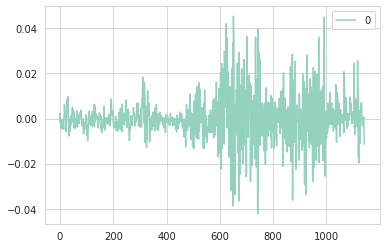

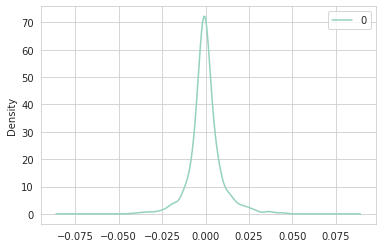

                  0
count  1.143000e+03
mean  -4.303763e-07
std    9.245817e-03
min   -4.229819e-02
25%   -3.777224e-03
50%   -5.754524e-04
75%    3.208271e-03
max    4.535639e-02


In [ ]:
model = ARIMA(train, order=(5,1,1))
model_fit = model.fit(disp=0)
print(model_fit.summary())
# plot residual errors
residuals = pd.DataFrame(model_fit.resid)
residuals.plot()
plt.show()
residuals.plot(kind='kde')
plt.show()
print(residuals.describe())

In [ ]:
predictions = list()
history=[x for x in train]
for t in range(len(test)):
    model = ARIMA(history, order=(5,1,1))
    model_fit = model.fit(disp=False, transparams=False)
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test[t]
    history.append(obs)
    
    #print('predicted=%f, expected=%f' % (yhat, obs))


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/arima_model.py:849: RuntimeWarning: invalid value encountered in double_scalars
  llf = -nobs / 2. * (log(2 * pi) + log(sigma2)) - ssr / (2 * sigma2)
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


In [ ]:
pred=pd.DataFrame(predictions, columns = ['Prediction'])
pred["Date"]=ydate
pred.set_index('Date', inplace=True)
y=eurtnd["Dernier Prix"].iloc[size:len(X)]

In [ ]:
pred.head()

,Prediction
Date,
2018-10-25,3.250927
2018-10-26,3.257414
2018-10-27,3.255755
2018-10-28,3.294416
2018-10-29,3.331727


In [ ]:
y=eurtnd.iloc[size:len(X)]
y.dtypes
y["Date"]=pd.to_datetime(y["Date"], format='%m/%d/%Y')
y.set_index('Date', inplace=True)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


Test RMSE: 0.016


<Figure size 1440x720 with 0 Axes>

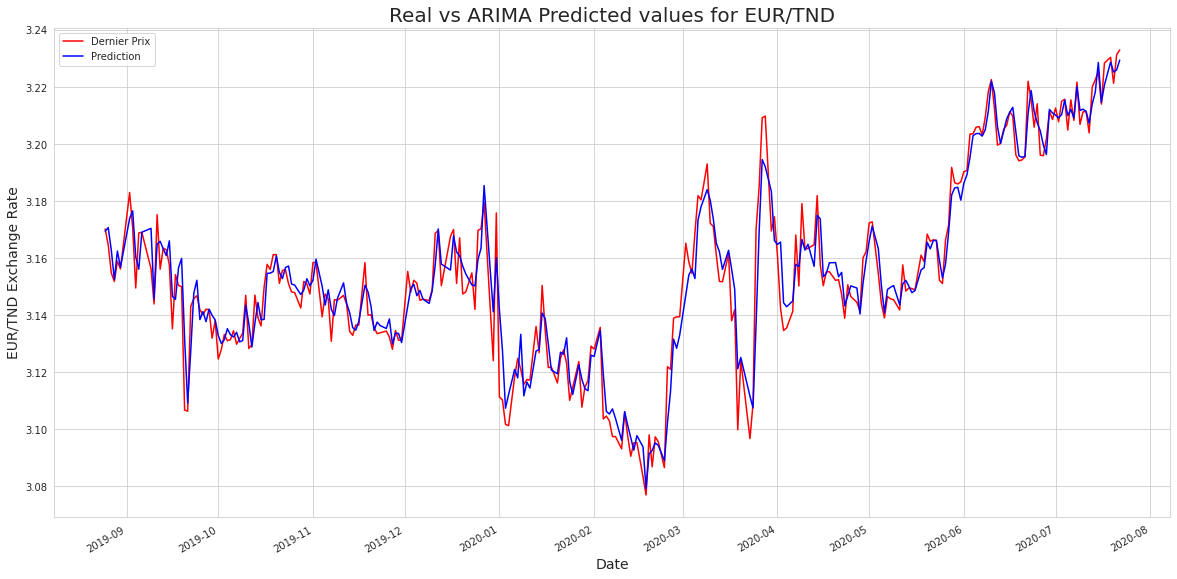

In [ ]:
from sklearn.metrics import mean_squared_error
error = mean_squared_error(test[:int(len(test)/2)], predictions[:int(len(predictions)/2)])
print('Test RMSE: %.3f' % np.sqrt(error))
# plot
plt.figure(figsize=(20,10))
ax=pd.DataFrame(y.iloc[int(y.shape[0]/2):]).plot(figsize=(20,10),color="red")
pd.DataFrame(pred.iloc[int(y.shape[0]/2):]).plot(color='blue',ax=ax)
plt.xlabel("Date", fontsize=14)
plt.ylabel("EUR/TND Exchange Rate", fontsize=14)
plt.title("Real vs ARIMA Predicted values for EUR/TND", fontsize=20)
plt.show()

In [ ]:
predictions = list()
history=[x for x in train]
for t in range(len(test)):
    model = ARIMA(history, order=(5,1,0))
    model_fit = model.fit(disp=False, transparams=False)
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test[t]
    history.append(yhat)
    
    #print('predicted=%f, expected=%f' % (yhat, obs))

    
    

In [ ]:
pred=pd.DataFrame(predictions, columns = ['Prediction'])
pred["Date"]=ydate
pred.set_index('Date', inplace=True)
y=eurtnd["Plus Haut"].iloc[size:len(X)]



Test RMSE: 0.476


<Figure size 1440x720 with 0 Axes>

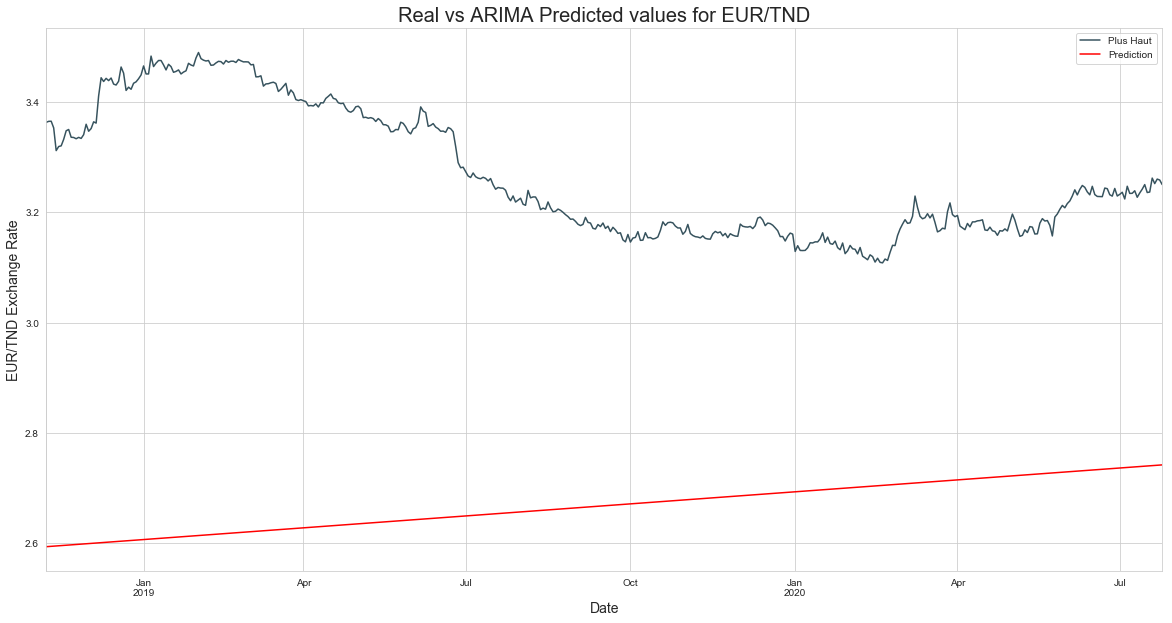

In [ ]:
from sklearn.metrics import mean_squared_error
error = mean_squared_error(test[:int(len(test)/2)], predictions[:int(len(predictions)/2)])
print('Test RMSE: %.3f' % np.sqrt(error))
# plot
plt.figure(figsize=(20,10))
ax=pd.DataFrame(y.iloc[int(y.shape[0]/2):]).plot(figsize=(20,10))
pd.DataFrame(pred.iloc[int(y.shape[0]/2):]).plot(color='red',ax=ax)
plt.xlabel("Date", fontsize=14)
plt.ylabel("EUR/TND Exchange Rate", fontsize=14)
plt.title("Real vs ARIMA Predicted values for EUR/TND", fontsize=20)
plt.show()

 ### Predict for USD/TND

In [ ]:
X=usdtnd["Plus Haut"].values
size = int(len(X) * 0.66)
train, test = X[0:size], X[size:len(X)]
ydate=date[size:len(X)]

In [ ]:
predictions = list()
history=[x for x in train]
test2=X[size:len(X)]
for t in range(len(test2)):
    model = ARIMA(history, order=(5,1,0))
    model_fit = model.fit(disp=False, transparams=False)
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test[t]
    history.append(obs)
    
    #print('predicted=%f, expected=%f' % (yhat, obs))


C:\Users\ALEX\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\ALEX\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


In [ ]:
pred=pd.DataFrame(predictions, columns = ['Prediction'])
pred["Date"]=ydate
pred.set_index('Date', inplace=True)
y=usdtnd["Plus Haut"].iloc[size:len(X)]

Test RMSE: 0.017


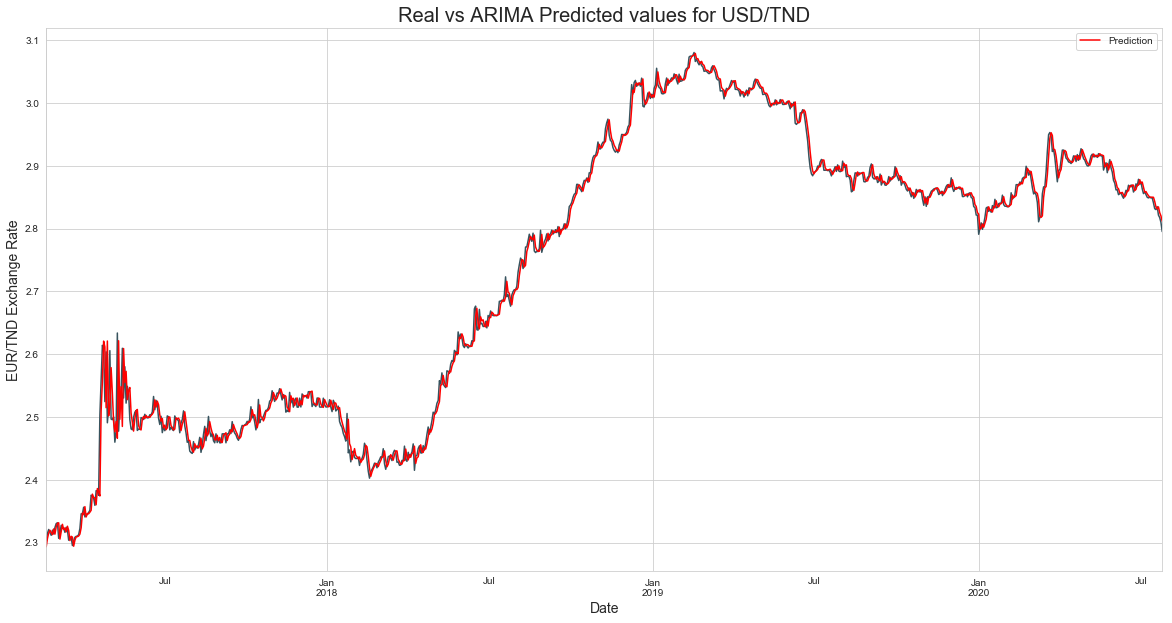

In [ ]:
error = mean_squared_error(test2, predictions)
print('Test RMSE: %.3f' % np.sqrt(error))
# plot
plt.figure(figsize=(20,10))
ax=y.plot()
pred.plot(color='red',ax=ax)
plt.xlabel("Date", fontsize=14)
plt.ylabel("EUR/TND Exchange Rate", fontsize=14)
plt.title("Real vs ARIMA Predicted values for USD/TND", fontsize=20)
plt.show()

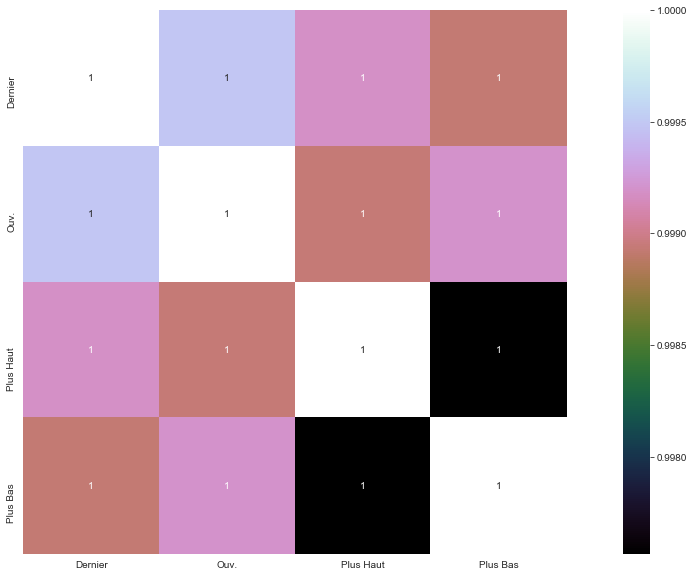

In [ ]:
needed_data=eurtnd
corr_mat=needed_data.corr(method='pearson')
plt.figure(figsize=(20,10))
sns.heatmap(corr_mat,vmax=1,square=True,annot=True,cmap='cubehelix')